In [6]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [16]:
# Simulated pilot study data
#np.random.seed(42)
control_group = np.random.normal(loc=115, scale=10, size=10)
treatment_group = np.random.normal(loc=120, scale=12, size=10)

# Calculate sample standard deviations
s_control = np.std(control_group, ddof=1)
s_treatment = np.std(treatment_group, ddof=1)

print(f"Control group standard deviation: {s_control:.2f}")
print(f"Treatment group standard deviation: {s_treatment:.2f}")

import math

def calculate_pooled_std(n1, n2, s1, s2):
    """
    Calculate the pooled standard deviation.

    Parameters:
    n1 (int): Sample size of the first group
    n2 (int): Sample size of the second group
    s1 (float): Sample standard deviation of the first group
    s2 (float): Sample standard deviation of the second group

    Returns:
    float: Pooled standard deviation
    """
    pooled_variance = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
    pooled_std = math.sqrt(pooled_variance)
    return pooled_std

# Example usage
n1 = 10  # Sample size of the first group
n2 = 10  # Sample size of the second group

pooled_std = calculate_pooled_std(n1, n2, s_control, s_treatment)
print(f"Pooled standard deviation: {pooled_std:.2f}")

def calculate_sample_size(alpha, beta, sigma, effect_size):
    """
    Calculate total sample size for a two-sample test (assuming equal variances).
    
    Parameters:
    alpha (float): Significance level (e.g., 0.05)
    beta (float): Statistical power (e.g., 0.80)
    sigma (float): Pooled standard deviation (or standard deviation if variances are equal)
    effect_size (float): Desired effect size (difference in means or proportions)
    
    Returns:
    total_sample_size (int): Total sample size needed per group
    
    """
    # Calculate Z-score for given alpha and beta
    Z_alpha = norm.ppf(1 - alpha/2)
    Z_beta = norm.ppf(1 - beta)
    
    # Calculate total sample size
    total_sample_size = (Z_alpha + Z_beta)**2 * 2 * sigma**2 / effect_size**2
    
    # Round up to nearest whole number (since sample size must be an integer)
    total_sample_size = math.ceil(total_sample_size)
    
    return total_sample_size

# Example usage
alpha = 0.05  # Significance level
beta = 0.20  # Corresponds to 1 - beta = 0.80 (80% power)

p_control = 115
delta = 2 # Minimum Detectable Effect
p_experiment = p_control + delta

# Calculate the effect size
effect_size = (p_experiment - p_control) / pooled_std

sigma = pooled_std   # Pooled standard deviation (assuming equal variances)

total_sample_size = calculate_sample_size(alpha, beta, sigma, effect_size)
print(f"Total sample size needed per group: {total_sample_size}")

Control group standard deviation: 11.48
Treatment group standard deviation: 13.29
Pooled standard deviation: 12.42
Total sample size needed per group: 93339


In [17]:
#------------------ Simulating Clck Data fo A/N Testing ----------------------------#
control_group = np.random.normal(loc=115, scale=10, size=total_sample_size)
treatment_group = np.random.normal(loc=120, scale=12, size=total_sample_size)

# Calculate sample standard deviations
s_control = np.std(control_group, ddof=1)
s_treatment = np.std(treatment_group, ddof=1)

print(f"Control group standard deviation: {s_control:.2f}")
print(f"Treatment group standard deviation: {s_treatment:.2f}")

pooled_std = calculate_pooled_std(total_sample_size, total_sample_size, s_control, s_treatment)
print(f"Pooled standard deviation: {pooled_std:.2f}")

SE = pooled_std
print("Standard Error is : " , SE)

Test_stat = (np.mean(treatment_group) -  np.mean(control_group))/SE
print("Test Statistics for 2-sample Z-test is : ", Test_stat)

alpha = 0.05
print("Alpha: significance level is : ", alpha)

Z_crit = norm.ppf(1 - alpha / 2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

p_value =  norm.sf(abs(Test_stat))
print("P-value of the 2-sample Z-test: ", round(p_value , 3))

CI = [round((np.mean(treatment_group) -  np.mean(control_group)) - SE * Z_crit, 3) , round((np.mean(treatment_group) -  np.mean(control_group)) + SE * Z_crit, 3)]
print("Cinfidence Interval of the 2 sample Z-test is : ", CI)

Control group standard deviation: 10.01
Treatment group standard deviation: 11.95
Pooled standard deviation: 11.02
Standard Error is :  11.023459590870912
Test Statistics for 2-sample Z-test is :  0.45723980835592154
Alpha: significance level is :  0.05
Z-critical value from Standard Normal distribution:  1.959963984540054
P-value of the 2-sample Z-test:  0.324
Cinfidence Interval of the 2 sample Z-test is :  [-16.565, 26.646]


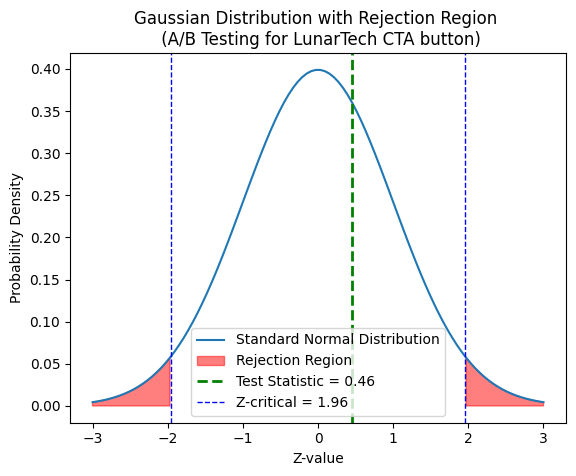

In [18]:
# Parameters for the standard normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Define the range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculate the y values for the standard normal distribution
y = norm.pdf(x, mu, sigma)

# Plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Define the critical value for the rejection region (Z_crit)
Z_crit = Z_crit  # for a 95% confidence level (two-tailed test)

# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')

# Adding Test Statistic
Test_stat = Test_stat  # Example test statistic
plt.axvline(Test_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {Test_stat:.2f}')

# Adding Z-critical values
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)


# Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA button)')
plt.legend()

# Show plot
plt.show()

In [19]:
def is_Practically_significant(delta, CI_95):
    """
    We assess if the difference between Control and Experimental group is practically significant using the Minimum Detectable Effect (MDE).
    
    Arguments:
    delta (float): The Minimum Detectable Effect (MDE) considered for practical significance.
    CI_95 (tuple): A tuple representing the lower and upper bounds of the 95% Confidence Interval.
    
    Returns:
    bool: True if practically significant, False otherwise.
    """
    
    # Extract lower bound of 95% Confidence Interval
    Lower_bound_CI = CI[0]
    
    # Check if the lower bound of the CI is greater than or equal to delta
    if Lower_bound_CI >= delta:
        print(f"We have practical significance! \nWith MDE of {delta}, the difference between Control and Experimental group is practically significant.")
        return True
    else:
        print("We don't have practical significance! \nThe difference between Control and Experimental group is not practically significant.")
        return False


# Call the function
significant = is_Practically_significant(delta , CI)
print("Lower bound of 95 % confidence interval is: ", CI[0])

We don't have practical significance! 
The difference between Control and Experimental group is not practically significant.
Lower bound of 95 % confidence interval is:  -16.565


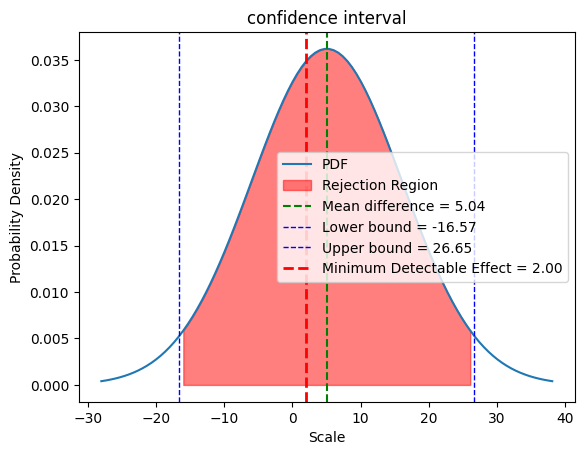

In [22]:
# Parameters for the standard normal distribution
mu = np.mean(treatment_group) -  np.mean(control_group)  # Mean
sigma = SE  # Standard deviation

# Define the range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculate the y values for the standard normal distribution
y = norm.pdf(x, mu, sigma)

# Plotting the standard normal distribution

plt.plot(x, y, label='PDF')

# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > round((np.mean(treatment_group) -  np.mean(control_group)) - SE * Z_crit, 3)) & (x < round((np.mean(treatment_group) -  np.mean(control_group)) + SE * Z_crit, 3)), color='red', alpha=0.5, label='Rejection Region')

# Add critical value and annotation
plt.axvline(x=(np.mean(treatment_group) -  np.mean(control_group)), color='green', linestyle='--', label=f'Mean difference = {(np.mean(treatment_group) -  np.mean(control_group)):.2f}')

# Adding Z-critical values
plt.axvline(round((np.mean(treatment_group) -  np.mean(control_group)) - SE * Z_crit, 3), color='blue', linestyle='dashed', linewidth=1, label=f'Lower bound = {round((np.mean(treatment_group) -  np.mean(control_group)) - SE * Z_crit, 3):.2f}')
plt.axvline(round((np.mean(treatment_group) -  np.mean(control_group)) + SE * Z_crit, 3), color='blue', linestyle='dashed', linewidth=1, label=f'Upper bound = {round((np.mean(treatment_group) -  np.mean(control_group)) + SE * Z_crit, 3):.2f}')

plt.axvline(delta, color='red', linestyle='dashed', linewidth=2, label=f'Minimum Detectable Effect = {delta:.2f}')

# Adding labels and title
plt.xlabel('Scale')
plt.ylabel('Probability Density')
plt.title('confidence interval')
plt.legend()

# Show plot
plt.show()

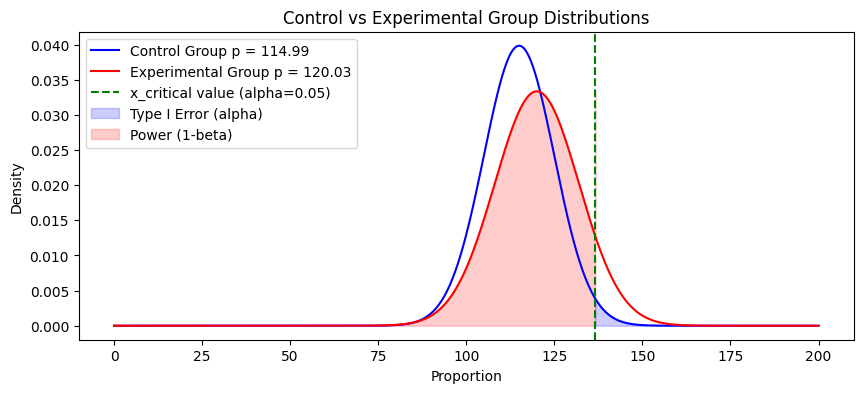

In [25]:
# Generate normal distributions
x = np.linspace(0, 200, 1000)
control_dist = norm(loc=np.mean(control_group), scale=s_control)
experiment_dist = norm(loc=np.mean(treatment_group), scale=s_treatment)

# Plot the distributions
plt.figure(figsize=(10, 4))
plt.plot(x, control_dist.pdf(x), label=f'Control Group p = {round(np.mean(control_group), 2)}', color='blue')
plt.plot(x, experiment_dist.pdf(x), label=f'Experimental Group p = {round(np.mean(treatment_group), 2)}', color='red')

# Significance level and critical value
z_critical = norm.ppf(1 - alpha / 2)
#x_critical = p_con_hat + z_critical * np.sqrt(p_con_hat * (1 - p_con_hat) / sample_size)
x_critical = np.mean(control_group) + z_critical * SE
plt.axvline(x=x_critical, color='green', linestyle='--', label=f'x_critical value (alpha={alpha})')

# Fill areas for alpha and power
plt.fill_betweenx(y=control_dist.pdf(x), x1=x, x2=x_critical, where=(x >= x_critical), color='blue', alpha=0.2, label='Type I Error (alpha)')
plt.fill_betweenx(y=experiment_dist.pdf(x), x1=x, x2=x_critical, where=(x <= x_critical), color='red', alpha=0.2, label='Power (1-beta)')

plt.title('Control vs Experimental Group Distributions')
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.legend()
plt.show()

In [27]:
# Decision based on the test
if p_value < alpha:
    print(f"Reject null hypothesis: p-value = {p_value:.4f}")
else:
    print(f"Fail to reject null hypothesis: p-value = {p_value:.4f}")

# Calculate Type 1 and Type 2 errors
if p_value < alpha:
    # Null hypothesis is rejected
    if (np.mean(control_group) + delta) <= np.mean(control_group) + SE * Z_crit:
        print(f"Type 1 error occurred")
    else:
        print(f"No Type 1 error occurred")
else:
    # Null hypothesis is not rejected
    if (np.mean(control_group) + delta) > np.mean(control_group) + SE * Z_crit:
        print(f"Type 2 error occurred")
    else:
        print(f"No Type 2 error occurred")

# Calculate statistical power (1 - beta)
beta = norm.cdf(Z_crit - delta/ SE)
statistical_power = 1 - beta
print(f"Statistical power (1 - beta): {statistical_power:.4f}")

Fail to reject null hypothesis: p-value = 0.3237
No Type 2 error occurred
Statistical power (1 - beta): 0.0377
